See the README.md file in the project folder for more details about this project, including the business case and primary question for the analysis. Criteria selection for the GBD Results Tool is also located in the README.

In [20]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

In [21]:
# Import the dataset and view the info and head of the data
gbd = pd.read_csv('/home/bruce/Desktop/coding-projects/GBD Datasets/IHME-GBD_2021_DATA-b411c487-1.csv')
print("===== Dataset Info =====" '\n')
gbd.info()
print('\n' "===== First five rows =====")
gbd.head()

===== Dataset Info =====

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330480 entries, 0 to 330479
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   measure_id     330480 non-null  int64  
 1   measure_name   330480 non-null  object 
 2   location_id    330480 non-null  int64  
 3   location_name  330480 non-null  object 
 4   sex_id         330480 non-null  int64  
 5   sex_name       330480 non-null  object 
 6   age_id         330480 non-null  int64  
 7   age_name       330480 non-null  object 
 8   cause_id       330480 non-null  int64  
 9   cause_name     330480 non-null  object 
 10  metric_id      330480 non-null  int64  
 11  metric_name    330480 non-null  object 
 12  year           330480 non-null  int64  
 13  val            330480 non-null  float64
 14  upper          330480 non-null  float64
 15  lower          330480 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage:

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,Deaths,81,Germany,1,Male,22,All ages,322,Lower respiratory infections,1,Number,2013,10589.331043,11468.867301,9438.654286
1,1,Deaths,81,Germany,2,Female,22,All ages,322,Lower respiratory infections,1,Number,2013,9320.401070,10434.169420,7542.508086
2,1,Deaths,81,Germany,3,Both,22,All ages,322,Lower respiratory infections,1,Number,2013,19909.732113,21708.585516,17103.527461
3,1,Deaths,81,Germany,1,Male,22,All ages,322,Lower respiratory infections,2,Percent,2013,0.024968,0.027020,0.022325
4,1,Deaths,81,Germany,2,Female,22,All ages,322,Lower respiratory infections,2,Percent,2013,0.020368,0.022754,0.016486


In [22]:
# Descriptive stats for the dataset
print("===== Descriptive statistics for the dataset =====")
gbd.describe()

===== Descriptive statistics for the dataset =====


,measure_id,location_id,sex_id,age_id,cause_id,metric_id,year,val,upper,lower
count,330480.000000,330480.000000,330480.000000,330480.00000,330480.000000,330480.000000,330480.000000,3.304800e+05,3.304800e+05,3.304800e+05
mean,4.029412,70.851852,2.000000,173.00000,665.823529,2.000000,2016.500000,2.107100e+05,2.442471e+05,1.817524e+05
std,2.134941,16.358744,0.816498,97.94401,291.141347,0.816498,2.872286,2.698877e+06,3.067813e+06,2.377335e+06
min,1.000000,45.000000,1.000000,22.00000,297.000000,1.000000,2012.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,54.000000,1.000000,124.00000,328.000000,1.000000,2014.000000,1.390339e-03,1.836781e-03,9.357030e-04
50%,5.000000,77.000000,2.000000,193.00000,515.000000,2.000000,2016.500000,4.286751e-01,5.427561e-01,3.230553e-01
75%,6.000000,86.000000,3.000000,242.00000,947.000000,3.000000,2019.000000,3.487790e+02,4.093847e+02,2.940222e+02
max,6.000000,93.000000,3.000000,284.00000,1048.000000,3.000000,2021.000000,1.585205e+08,1.755399e+08,1.434200e+08


In [23]:
# Count NAs in dataset
print("===== Number of NA values per variable =====")
gbd.isna().sum()

===== Number of NA values per variable =====


measure_id       0
measure_name     0
location_id      0
location_name    0
sex_id           0
sex_name         0
age_id           0
age_name         0
cause_id         0
cause_name       0
metric_id        0
metric_name      0
year             0
val              0
upper            0
lower            0
dtype: int64

In [26]:
print("===== Counts per location =====")
gbd['location_name'].value_counts()

===== Counts per location =====


location_name
Germany        12240
Slovenia       12240
Hungary        12240
Portugal       12240
Malta          12240
Greece         12240
Lithuania      12240
Netherlands    12240
Belgium        12240
Cyprus         12240
Austria        12240
Romania        12240
Bulgaria       12240
Italy          12240
Spain          12240
Latvia         12240
Luxembourg     12240
Denmark        12240
Croatia        12240
Czechia        12240
Slovakia       12240
Estonia        12240
Poland         12240
France         12240
Ireland        12240
Sweden         12240
Finland        12240
Name: count, dtype: int64

Data appears mostly clean with no obvious missing data. Variable IDs (e.g., measure_id, location_id, etc.) were included by mistake during download (GBD results tool gives you the option to only include IDs, names, or both). Will remove since columns already exist with correct labels for each of these IDs. Will also change 'object' data types to 'category'. Consider dropping "_name" from column labels?

In [27]:
# Remove ID columns
drop_columns = ['measure_id', 'location_id', 'sex_id', 'age_id', 'cause_id', 'metric_id']

gbd = gbd.drop(
    labels = drop_columns,
    axis = 1
)

gbd

,measure_name,location_name,sex_name,age_name,cause_name,metric_name,year,val,upper,lower
0,Deaths,Germany,Male,All ages,Lower respiratory infections,Number,2013,10589.331043,11468.867301,9438.654286
1,Deaths,Germany,Female,All ages,Lower respiratory infections,Number,2013,9320.401070,10434.169420,7542.508086
2,Deaths,Germany,Both,All ages,Lower respiratory infections,Number,2013,19909.732113,21708.585516,17103.527461
3,Deaths,Germany,Male,All ages,Lower respiratory infections,Percent,2013,0.024968,0.027020,0.022325
4,Deaths,Germany,Female,All ages,Lower respiratory infections,Percent,2013,0.020368,0.022754,0.016486
...,...,...,...,...,...,...,...,...,...,...
330475,Incidence,Spain,Female,20-54 years,Asthma,Percent,2021,0.000490,0.000671,0.000353
330476,Incidence,Spain,Both,20-54 years,Asthma,Percent,2021,0.000433,0.000586,0.000311
330477,Incidence,Spain,Male,20-54 years,Asthma,Rate,2021,123.584280,163.491555,86.549419
330478,Incidence,Spain,Female,20-54 years,Asthma,Rate,2021,213.068617,286.626852,155.875266


In [28]:
# Remove _name from column labels
col_names = {'measure_name': 'measure',
             'location_name': 'location',
             'sex_name': 'sex',
             'age_name': 'age',
             'cause_name': 'cause',
             'metric_name': 'metric'}

gbd.rename(columns=col_names,
           inplace=True)

gbd

,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Deaths,Germany,Male,All ages,Lower respiratory infections,Number,2013,10589.331043,11468.867301,9438.654286
1,Deaths,Germany,Female,All ages,Lower respiratory infections,Number,2013,9320.401070,10434.169420,7542.508086
2,Deaths,Germany,Both,All ages,Lower respiratory infections,Number,2013,19909.732113,21708.585516,17103.527461
3,Deaths,Germany,Male,All ages,Lower respiratory infections,Percent,2013,0.024968,0.027020,0.022325
4,Deaths,Germany,Female,All ages,Lower respiratory infections,Percent,2013,0.020368,0.022754,0.016486
...,...,...,...,...,...,...,...,...,...,...
330475,Incidence,Spain,Female,20-54 years,Asthma,Percent,2021,0.000490,0.000671,0.000353
330476,Incidence,Spain,Both,20-54 years,Asthma,Percent,2021,0.000433,0.000586,0.000311
330477,Incidence,Spain,Male,20-54 years,Asthma,Rate,2021,123.584280,163.491555,86.549419
330478,Incidence,Spain,Female,20-54 years,Asthma,Rate,2021,213.068617,286.626852,155.875266


In [29]:
# Change object data types to category
gbd[['measure', 'location', 'sex', 'age', 'cause', 'metric']] = gbd[['measure', 'location', 'sex', 'age', 'cause', 'metric']].astype('category')
gbd.dtypes

measure     category
location    category
sex         category
age         category
cause       category
metric      category
year           int64
val          float64
upper        float64
lower        float64
dtype: object

Data is clean and ready for visualization and exploratory data analysis.

In [30]:
# Count the values of the categorical columns
gbd[['measure', 'location', 'sex', 'age', 'cause', 'metric']].apply(pd.Series.value_counts)

,measure,location,sex,age,cause,metric
20-54 years,NaN,NaN,NaN,82620.0,NaN,NaN
55+ years,NaN,NaN,NaN,82620.0,NaN,NaN
<20 years,NaN,NaN,NaN,82620.0,NaN,NaN
All ages,NaN,NaN,NaN,82620.0,NaN,NaN
Asthma,NaN,NaN,NaN,NaN,29160.0,NaN
Austria,NaN,12240.0,NaN,NaN,NaN,NaN
Belgium,NaN,12240.0,NaN,NaN,NaN,NaN
Both,NaN,NaN,110160.0,NaN,NaN,NaN
Bulgaria,NaN,12240.0,NaN,NaN,NaN,NaN
COVID-19,NaN,NaN,NaN,NaN,29160.0,NaN


Measures (prevalence, incidence, deaths) do not contain same number of values. Also, 'Latent tuberculosis infection' only has 9720 values compared to 29160 for all other causes. Did reporting methods change (e.g., not reporting incidence, prevalence, rates, etc.)? Will do a more detailed and aggregated analysis to determine the root cause.

In [31]:
# Yearly distribution by country
country_year_counts = (
    gbd.groupby(['location', 'year'], observed=False)
    .size()
    .reset_index(name='entries_per_year')
    .pivot(index='location', columns='year', values='entries_per_year')
    .fillna(0)
)
print(country_year_counts)

year         2012  2013  2014  2015  2016  2017  2018  2019  2020  2021
location                                                               
Austria      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Belgium      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Bulgaria     1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Croatia      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Cyprus       1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Czechia      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Denmark      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Estonia      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Finland      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
France       1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Germany      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Greece       1224  1224  1224  1224  1224  1224  1224  1224  122

All countries reported the same data for all years, so the missing isn't associated with a particular country or countries not reporting in a given year. Will look at cause per country

In [32]:
# Cause per country
country_cause_counts = (
    gbd.groupby(['location', 'cause'], observed=False)
    .size()
    .reset_index(name='entries_per_cause')
)

# Pivot for better visualization
cause_pivot = country_cause_counts.pivot(
    index='location',
    columns='cause',
    values='entries_per_cause'
).fillna(0)
print(cause_pivot)

cause        Asthma  COVID-19  Chronic obstructive pulmonary disease  \
location                                                               
Austria        1080      1080                                   1080   
Belgium        1080      1080                                   1080   
Bulgaria       1080      1080                                   1080   
Croatia        1080      1080                                   1080   
Cyprus         1080      1080                                   1080   
Czechia        1080      1080                                   1080   
Denmark        1080      1080                                   1080   
Estonia        1080      1080                                   1080   
Finland        1080      1080                                   1080   
France         1080      1080                                   1080   
Germany        1080      1080                                   1080   
Greece         1080      1080                                   

The number of 'Latent tuberculosis infection' per country is 360, so ALL countries are missing values. The difference between 'Latent tuberculosis infection' and other causes is 720. Are there missing measures or metrics for latent tuberculosis? This would make sense if reporting methods changed. Will verify by counting each measure by cause.

In [33]:
prev = gbd[gbd['measure'].str.contains('prev', case=False)].groupby('cause', observed = False).size()
inci = gbd[gbd['measure'].str.contains('inci', case=False)].groupby('cause', observed = False).size()
death = gbd[gbd['measure'].str.contains('death', case=False)].groupby('cause', observed = False).size()

# Combine into single DataFrame
measure_counts = pd.DataFrame({
    'prevalence': prev,
    'incidence': inci,
    'deaths': death
}).fillna(0).astype(int)

# Add totals
measure_counts['Total'] = measure_counts.sum(axis=1)
measure_counts.loc['Total'] = measure_counts.sum()

print("===== Manual count per cause: =====")
print(measure_counts)

===== Manual count per cause: =====
                                                    prevalence  incidence  \
cause                                                                       
Asthma                                                    9720       9720   
COVID-19                                                  9720       9720   
Chronic obstructive pulmonary disease                     9720       9720   
Drug-susceptible tuberculosis                             9720       9720   
Extensively drug-resistant tuberculosis                   9720       9720   
Latent tuberculosis infection                             9720          0   
Lower respiratory infections                              9720       9720   
Multidrug-resistant tuberculosis without extens...        9720       9720   
Respiratory infections and tuberculosis                   9720       9720   
Tracheal, bronchus, and lung cancer                       9720       9720   
Tuberculosis                            

Incidence and deaths are indeed missing for latent tuberculosis infection. The assumption is that reporting methods changed.

The number of deaths per cause per country is an important measure as it indicates "hot spots" for specific diseases and also identifies areas where changes in health policy (e.g., surveillance, testing, improving access to care, etc.) could impact outcomes. Will create a heatmap to visualize this.

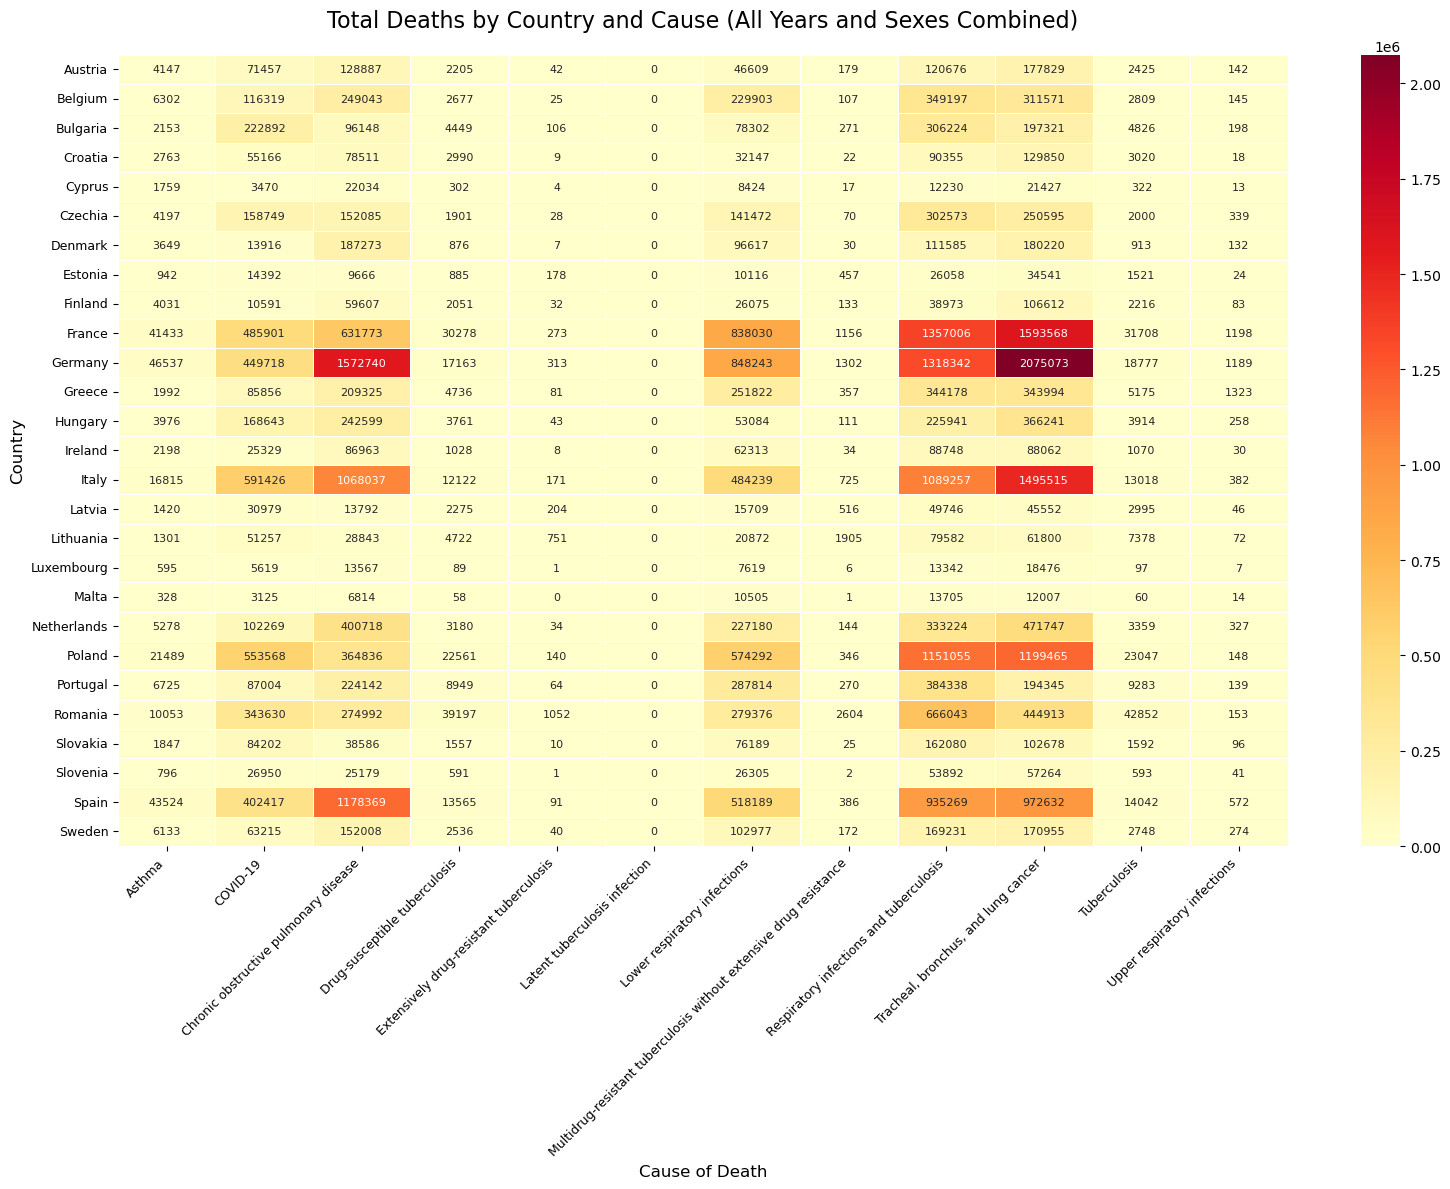

In [34]:
# Heatmap to compare the number of deaths per cause per country

# Filter for death records
gbd_deaths = gbd[gbd['measure'] == 'Deaths']

# Create a pivot table: countries vs causes
pivot_table = pd.pivot_table(
    gbd_deaths,
    index='location',      # Rows: Countries
    columns='cause',       # Columns: Causes
    values='val',          # Will use the reported value instead of the standard deviation for simplicity
    aggfunc='sum',         # Sum death counts for each country-cause combination
    fill_value=0,          # Fill missing combinations with 0
    observed=False
)

# For large datasets - focus on top entries
# top_countries = pivot_table.sum(axis=1).sort_values(ascending=False).head(20).index
# top_causes = pivot_table.sum().sort_values(ascending=False).head(15).index
# pivot_table = pivot_table.loc[top_countries, top_causes]

plt.figure(figsize=(16, 12))  # Adjust size based on data density

# Create heatmap with annotations
ax = sns.heatmap(
    pivot_table,
    annot=True,            # Show numbers in cells
    fmt=".0f",             # Format as integers
    cmap="YlOrRd",         # Yellow-Orange-Red color scale
    linewidths=.5,         # Add grid lines
    annot_kws={"size": 8}  # Annotation font size
)

# Customize labels
plt.title("Total Deaths by Country and Cause (All Years and Sexes Combined)", fontsize=16, pad=20)
plt.xlabel("Cause of Death", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()
plt.show()


## replace with an interactice plot similar to the death rates below?

France, Germany, and Spain have much higher asthma-related deaths compared to other countries. This could be explained by the larger total populations for each of these countries compared to the other EU-27 member states.

Germany, Spain, and Italy have a significant number of COPD-related deaths. Again, likely attributed to the larger total populations of these states. However, it would be interesting to compare the deaths with smoking prevalence. However, that's not available in this dataset.

There are an extremely high number of deaths attributed to tracheal, bronchus, and lung cancers across all states. Again, it would be interesting to compare the deaths with smoking prevalence in these countries.

Also of note is the number of COVID-related deaths compared to other measures. It's important to keep in mind that COVID-related deaths have only been tracked since 2020, so there are only 2 years of collected data for these deaths compared to collection across all years for all other causes of death.

This heatmap is a good overview of the actual number of deaths per country. However, it does not account for the total populations of the countries and may be deceiving. For instance, Portugal has ~384,000 deaths attributed to respiratory infections and tuberculosis and is not flagged as "high" in comparison to the ~1.35 million deaths in France for the same measure. This is deceiving as the total population of Portugal is ~10 million compared to a total population of ~66 million in France (looking at 2021 estimated population statistics).

In [68]:
# A more "compact" heatmap if presentation space is an issue. A little more difficult to interpret at first glance.
# Change the colors and add gridlines?

fig = px.imshow(
    death_rates.pivot_table(
        index='location',
        columns='cause',
        values='val',
        aggfunc='mean',
        fill_value=0,
        observed=False
    ),
    labels=dict(x="Cause of Death", y="Country", color="Rate/100k"),
    color_continuous_scale='YlOrRd',
    title='Average Respiratory Death Rates by Country and Cause (2012 - 2021, All Ages, Both Sexes)'
)

fig.update_layout(
    height=800, 
    width=800,
    xaxis = dict(tickangle=-30))
fig.update_traces(
    hovertemplate="<b>%{y}</b><br>Cause: %{x}<br>Rate: %{z:.1f} per 100k"
)
fig.show()

COVID-19, COPD, lower respiratory infections, respiratory infections and tuberculosis, and tracheal/bronchus/lung cancer are the key areas to focus on based on this heatmap.

The rates of death for asthma are relatively low for all countries in comparison to other causes. However, Portugal does have one of the higher rates of death compared to other countries.

Bulgaria has a very high rate of deaths for respiratory infections and tuberculosis with a rate of 106.8/100,000 that far surpasses all of the other EU-27 countries. Portugal also has a very high rate of death for respiratory infections and tuberculosis with a rate of 87.5/100,000. It appears that Portugal struggles with respiratory infection-related deaths in general, with its highest rates of death being respiratory infections and tuberculosis and lower respiratory infections. 

It's important to breakdown this data by age and sex for potential health disparities purposes. Will create a dropdown view for filtering.

In [24]:
# Filter for death rates
death_rates = gbd[
    (gbd['measure'] == 'Deaths') & 
    (gbd['metric'] == 'Rate')
]

# Get available options
available_countries = death_rates['location'].unique().tolist()
sex_options = death_rates['sex'].unique().tolist()
age_options = death_rates['age'].unique().tolist()
year_options = sorted(death_rates['year'].unique().tolist())  # Sort years chronologically

# Set safe default values
default_sex = 'Both' if 'Both' in sex_options else sex_options[0]
default_age = 'All ages' if 'All ages' in age_options else age_options[0]
default_year = year_options[-1]  # Default to most recent year

@interact(
    Sex=Dropdown(options=sex_options, value=default_sex, description='Sex:'),
    Age=Dropdown(options=age_options, value=default_age, description='Age Group:'),
    Year=Dropdown(options=year_options, value=default_year, description='Year:')
)
def create_interactive_plot(Sex, Age, Year):
    # Filter data based on selections
    filtered_data = death_rates[
        (death_rates['sex'] == Sex) & 
        (death_rates['age'] == Age) &
        (death_rates['year'] == Year) &
        (death_rates['location'].isin(available_countries))
    ]
    
    if filtered_data.empty:
        print("No data available for the selected filters.")
        return
    
    # Create the plot
    fig = px.scatter(
        filtered_data,
        x='cause',
        y='val',
        color='location',
        labels={'val': 'Death Rate per 100k'},
        title=f'Respiratory Death Rates: {Sex} | {Age} | {Year}',
        height=600,
        width=1000
    )
    
    # Customize layout
    fig.update_layout(
        xaxis_title="Cause of Death",
        yaxis_title="Death Rate",
        legend_title="Country",
        hovermode='closest'
    )
    
    # Improve readability
    fig.update_xaxes(tickangle=30)
    fig.update_traces(
        marker=dict(size=12),
        hovertemplate=(
            "<b>%{fullData.name}</b><br>"
            "Cause: %{x}<br>"
            "Rate: %{y:.1f} per 100k"
        )
    )
    
    fig.show()

    ## I prefer this presentation. Lots of information available and can filter to what is desired

interactive(children=(Dropdown(description='Sex:', index=2, options=('Male', 'Female', 'Both'), value='Both'),…

Looking at 2012 (since it's the "starting point" for this dataset), the primary cause of death for males and females that are <20 years is respiratory infections and tuberculosis and lower respiratory infections. This trend holds true through 2019. While respiratory infections and tuberculosis and lower respiratory infections remain the highest causes of death for 2020 and 2021, COVID-19 takes a close third place. This is represented in the literature. It would be interesting to determine if future respiratory infection-related deaths (upper or lower) are caused by long COVID, particularly in the younger populations who will have to live with the effects of long COVID for many years. This could significantly impact health systems by increasing cost of care and the burden on the existing health system due to increased utilization.

Interestingly, the death rates for COVID-19 and respiratory infections and tuberculosis are nearly identical for several EU-27 countries for 2020 and 2021. It would be interesting to determine if there is overlap (e.g, a death reported as due to "respiratory infection" that was actually caused by COVID-19 and vice versa). There were documented cases of the cause of death being misreported during the initial stages of the COVID-19 pandemic for multiple reasons (largely due to overwhelmed healthcare workforces).

Looking only at COVID-19 related deaths between age groups for 2020 and 2021, older populations have much higher death rates due to COVID-19 compared to other causes when compared to those <20 years of age. Those in the 55+ year group have significantly higher death rates compared to the younger age groups (<20 years and 20-54 years). This is also backed by the literature as older populations tend to suffer more severe complications from COVID-19.

Specifically for the 55+ years group, the primary cause of death is COPD, respiratory infections and tuberculosis, lower respiratory infections, and tracheal/bronchus/lung cancer. This holds true for both males and females from 2012-2019 until COVID-19 death rates become the leading cause in 2020-2021. Interestingly, males in the 55+ years group have higher rates of death related to the primary causes of death in the 55+ age group when compared to females. It would be interesting to determine smoking history (total years and pack/years) impact (e.g., do males have a more significant smoke history compared to females in the EU-27?). The deaths attributed to tracheal/bronchus/lung cancer remain relatively stable across all EU-27 countries from 2012-2021.

In [ ]:
# Filter for incidence rates
incidence_rates = gbd[
    (gbd['measure'] == 'Incidence') & 
    (gbd['metric'] == 'Rate')
]

# Get available options
available_countries = incidence_rates['location'].unique().tolist()
sex_options = incidence_rates['sex'].unique().tolist()
age_options = incidence_rates['age'].unique().tolist()
year_options = sorted(incidence_rates['year'].unique().tolist())  # Sort years chronologically

# Set safe default values
default_sex = 'Both' if 'Both' in sex_options else sex_options[0]
default_age = 'All ages' if 'All ages' in age_options else age_options[0]
default_year = year_options[-1]  # Default to most recent year

@interact(
    Sex=Dropdown(options=sex_options, value=default_sex, description='Sex:'),
    Age=Dropdown(options=age_options, value=default_age, description='Age Group:'),
    Year=Dropdown(options=year_options, value=default_year, description='Year:')
)
def create_interactive_plot(Sex, Age, Year):
    # Filter data based on selections
    filtered_data = incidence_rates[
        (incidence_rates['sex'] == Sex) & 
        (incidence_rates['age'] == Age) &
        (incidence_rates['year'] == Year) &
        (incidence_rates['location'].isin(available_countries))
    ]
    
    if filtered_data.empty:
        print("No data available for the selected filters.")
        return
    
    # Create the plot
    fig = px.scatter(
        filtered_data,
        x='cause',
        y='val',
        color='location',
        labels={'val': 'Incidence Rate per 100k'},
        title=f'Incidence Rates: {Sex} | {Age} | {Year}',
        height=600,
        width=1000
    )
    
    # Customize layout
    fig.update_layout(
        xaxis_title="Cause of Death",
        yaxis_title="Incidence Rate",
        legend_title="Country",
        hovermode='closest'
    )
    
    # Improve readability
    fig.update_xaxes(tickangle=30)
    fig.update_traces(
        marker=dict(size=12),
        hovertemplate=(
            "<b>%{fullData.name}</b><br>"
            "Cause: %{x}<br>"
            "Rate: %{y:.1f} per 100k"
        )
    )
    
    fig.show()
    
    
    ## Need to fix values

interactive(children=(Dropdown(description='Sex:', index=2, options=('Male', 'Female', 'Both'), value='Both'),…

Focus for health policies and initiatives based on insights from this dataset:
* COVID-19-related deaths still appear to be a major problem for all countries and almost directly parallels the death rates for respiratory infections and tuberculosis. Surveillance of COVID-19 should still be a focus, particularly due to the increased infectivity noted with mutations during 2021 and 2022. This could be achieved by monitoring wastewater.
* Smoking cessation programs could help reduce the death rates for COPD and tracheal/bronchus/lung cancer.
* Tuberculosis is infectious and should continue to be monitored, but it appears that current surveillance programs are effective.

Focus of future studies/datasets based on insights from this dataset:
* Compare respiratory causes of death in those with COPD to those without. It would be interesting to compare the death rates for respiratory infections and tracheal/bronchus/lung cancers between those with and without COPD. Recurrent respiratory infections are common in those with COPD. However, there is not enough information available in this particular dataset to determine the impact of a history of COPD on respiratory infection-related deaths. It is not surprising that the death rates for COPD and tracheal/bronchus/lung cancer are similar in this dataset considering that smoking history significantly impacts the development of both COPD and cancer (and oftentimes simultaneous diagnosis).
* Compare respiratory causes of death in those with long COVID to those without, particularly in the younger populations. It would also be interesting/imperative to trend recurrent infections/complications in the same individuals in a long-term follow-up study (e.g., > 10 years). Long COVID-related complications will likely have significant impacts as the younger populations age. It would be imperative for health systems/countries to determine the potential financial and care utilization impacts.

**Will continue visualizing the remaining measures across all countries and will trend each measure across years.**

Visualization ideas:
* Incidence by age group and sex
* Prevalence by age group and sex
* Trends: compare death rates over time in the hotspots (COPD, lower respiratory infections, respiratory infections and TB, T/B/L cancer)
* Incidence and prevalence over time
* Visualize by "groups": chronic vs acute processes

#### Previously used code that works but likely not used in final presentation:

In [ ]:
#### The following code works but slows the notebook down considerably ####
## The interactive heatmap and interactive plot are better options to replace this interactive chart

# Interactive bar chart for total deaths by country and cause for all years

fig = px.bar(
    gbd_deaths,
    x='location',
    y='val',
    color='cause',
    barmode='group',
    log_y=True,
    title="Total Deaths by Country and Cause"
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [ ]:
## Interactive heatmap

# Filter directly to the needed data
death_rates = gbd[
    (gbd['measure'] == 'Deaths') & 
    (gbd['metric'] == 'Rate') & 
    (gbd['sex'] == 'Both') & 
    (gbd['age'] == 'All ages')
]

# Create pivot table in one step
rate_pivot = death_rates.pivot_table(
    index='location',
    columns='cause',
    values='val',
    aggfunc='mean',
    fill_value=0,
    observed=False
)

# Create interactive heatmap
fig = px.imshow(
    rate_pivot,
    labels=dict(x="Cause of Death", y="Country", color="Death Rate/100k"),
    color_continuous_scale='YlOrRd',
    title='Average Respiratory Death Rates by Country and Cause (2012-2021, All Ages, Both Sexes)',
    aspect="auto"
)

# Customize layout
fig.update_layout(
    xaxis_title="Cause of Death",
    yaxis_title="Country",
    height=700,
    width=1000,
    hovermode="closest"
)

# Improve hover template
fig.update_traces(
    hovertemplate=(
        "<b>Country:</b> %{y}<br>"
        "<b>Cause:</b> %{x}<br>"
        "<b>Death Rate:</b> %{z:.1f} per 100,000"
    )
)


fig.show()


## All locations are not listed - need to fix if keeping this version

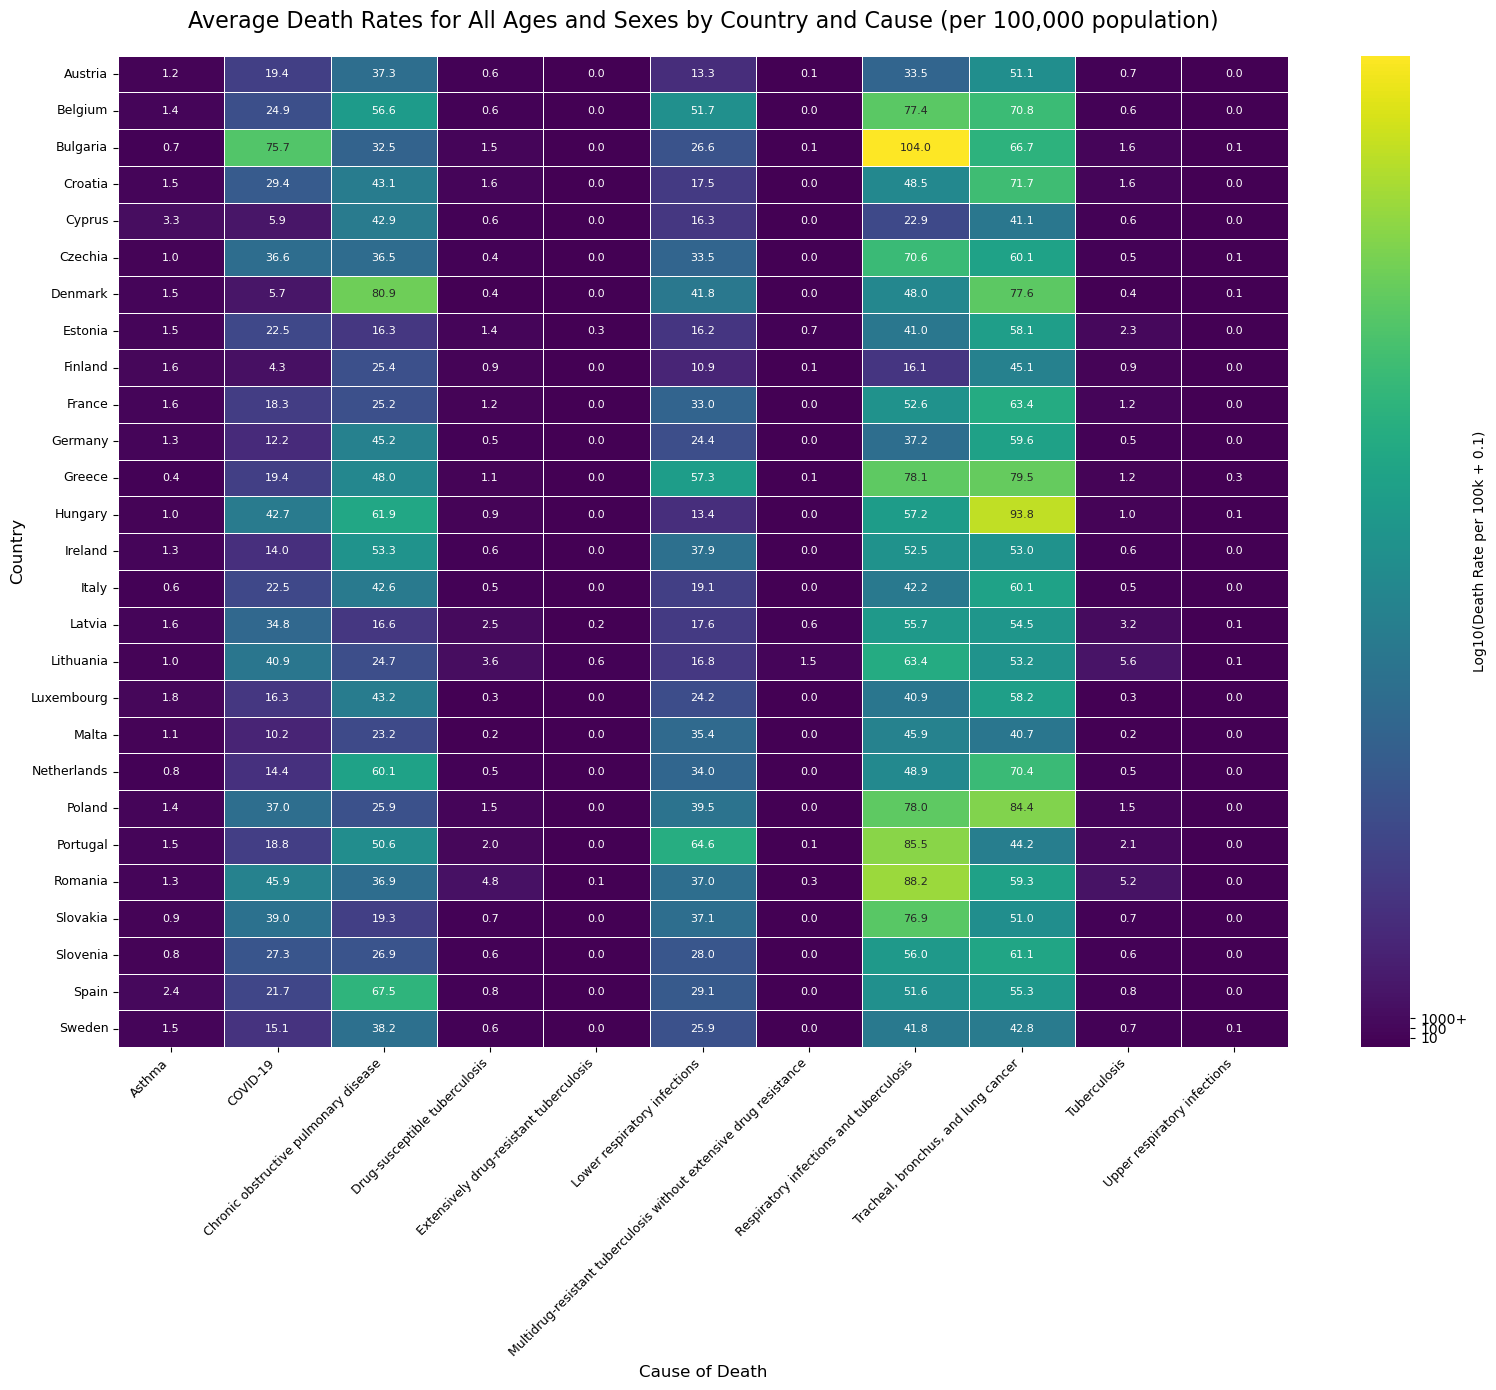

In [22]:
## Initial heatmap for death rates - replaced with interactive plot
## This heatmap is "boring" - best to not use


# Pivot table for heatmap
heatmap_data = death_rates.pivot_table(
    index='location',
    columns='cause',
    values='val',
    aggfunc='mean',  # Average across years
    fill_value=0,
    observed=False
)

# Apply log transformation for better visualization
#log_data = np.log10(heatmap_data + 0.1)  # Add 0.1 to handle zeros

# Create the heatmap
plt.figure(figsize=(16, 14))
ax = sns.heatmap(
    heatmap_data,
    cmap="viridis",
    linewidths=0.5,
    annot=heatmap_data.round(1),  # Show original rates in annotations
    fmt=".1f",
    annot_kws={"size": 8},
    cbar_kws={
        'label': 'Log10(Death Rate per 100k + 0.1)',
        'ticks': np.log10([0.1, 1, 10, 100, 1000])
    }
)

# Customize the plot
plt.title("Average Death Rates for All Ages and Sexes by Country and Cause (per 100,000 population)", 
          fontsize=16, pad=20)
plt.xlabel("Cause of Death", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)

# Improve colorbar labeling
cbar = ax.collections[0].colorbar
cbar.set_ticklabels(['<0.1', '1', '10', '100', '1000+'])

plt.tight_layout()
plt.show()

In [ ]:
## interactive scatterplot
#### doesn't include all locations for some reason and it's too busy - would be best to graph each sex individually

fig = px.scatter(
    death_rates,
    x='cause',
    y='location',
    color='val',
    facet_col='age',
    facet_row='sex',
    color_continuous_scale='YlOrRd',
    labels={'val': 'Death Rate'},
    height=900,
    width=1200
)

fig.update_layout(
    title='Respiratory Death Rates by Country, Age and Sex',
    xaxis_title="Cause of Death",
    yaxis_title="Country"
)

fig.update_traces(
    marker=dict(size=12),
    hovertemplate=(
        "<b>%{y}</b><br>"
        "Cause: %{x}<br>"
        "Age: %{meta[0]}<br>"
        "Sex: %{meta[1]}<br>"
        "Rate: %{z:.1f} per 100k"
    ),
    meta=death_rates[['age', 'sex']]  # Add extra hover fields
)

fig.update_xaxes(tickangle=45)
fig.show()

